In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(palette='deep', style='darkgrid', rc={"figure.figsize": (15, 4)})
import scipy.stats as st

import warnings
warnings.simplefilter('ignore')

# Линейные модели
Сгенерируем исскуственные данные, на основе функции: $ f(x) = 4x+5 $

In [3]:
def lin_function(x):
    return 4*x+5

x_true = np.array([-2,2])
y_true = lin_function(x_true)



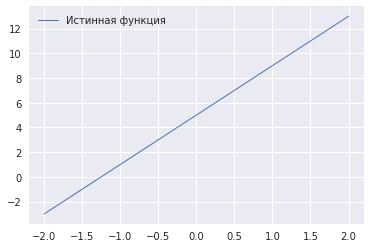

In [4]:
plt.plot(x_true, y_true, linewidth=1)
plt.legend(['Истинная функция'])
plt.show()

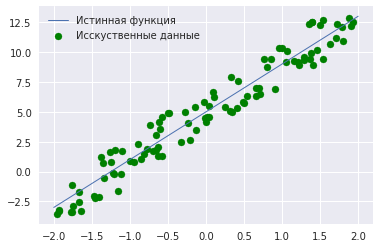

In [5]:
n = 100
x = np.random.rand(n,1)*4-2
e = np.random.rand(n,1)*4-2
y = lin_function(x) + e

plt.scatter(x, y, color='g')
plt.plot(x_true, y_true, linewidth=1)
plt.legend(['Истинная функция', 'Исскуственные данные'])
plt.show()

# Аналитический метод
$$\hat \theta = \bigl(X^T \cdot X  \bigr)^{-1} \cdot X^T \cdot y $$

In [6]:
x_matrix = np.c_[np.ones((n,1)),x]

In [7]:
%%time
thetha_matrix = np.linalg.inv(x_matrix.T.dot(x_matrix)).dot(x_matrix.T).dot(y)

CPU times: user 0 ns, sys: 10 ms, total: 10 ms
Wall time: 24.8 ms


In [8]:
print("Свободный член: {[0][0]:.7}".format(thetha_matrix.T))
print("Коэфициент: {[0][1]:.7}".format(thetha_matrix.T))

Свободный член: 4.915729
Коэфициент: 4.026361


In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [10]:
%%time
lr = LinearRegression()
lr.fit(x,y)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.78 ms


In [11]:
print("Свободный член: {:.7}".format(lr.intercept_[0]))
print("Коэфициент: {:.7}".format(lr.coef_[0][0]))

Свободный член: 4.915729
Коэфициент: 4.026361


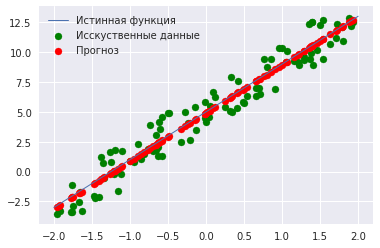

In [12]:
plt.scatter(x, y, color='g')
plt.scatter(x, lr.predict(x), color='r')
plt.plot(x_true, y_true, linewidth=1)
plt.legend(['Истинная функция', 'Исскуственные данные', 'Прогноз'])
plt.show()

# Пакетный градиентный спуск

$$\nabla MSE(\theta)= \frac{2}{l} X^T \cdot \bigl(X \cdot \theta - y \bigr) $$

### Реализация в numpy

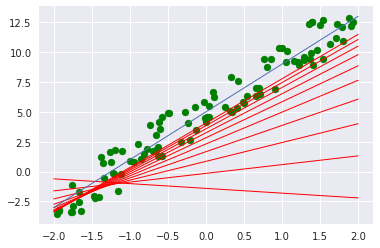

[[4.91572913]
 [4.02636132]]
CPU times: user 430 ms, sys: 270 ms, total: 700 ms
Wall time: 460 ms


In [13]:
%%time
eta = 0.1  # learning rate
n_iterations = 100


theta = np.random.randn(2,1)  # random initialization

plt.scatter(x, y, color='g')

for iteration in range(n_iterations):
    if iteration < 10:
        plt.plot(x_true, x_true*theta[1]+theta[0], linewidth=1, color='r')
    gradients = 2/n * x_matrix.T.dot(x_matrix.dot(theta) - y)
    theta = theta - eta * gradients

plt.plot(x_true, y_true, linewidth=1)
plt.show()

print(theta)

### Слишком маленький шаг обучения (learning rate)

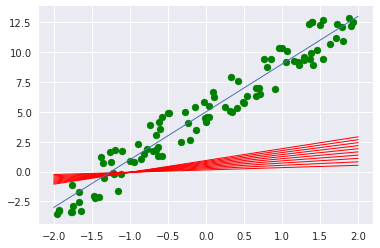

In [14]:
eta = 0.01  # learning rate
n_iterations = 100


theta = np.random.randn(2,1)  # random initialization

plt.scatter(x, y, color='g')

for iteration in range(n_iterations):
    if iteration < 10:
        plt.plot(x_true, x_true*theta[1]+theta[0], linewidth=1, color='r')
    gradients = 2/n * x_matrix.T.dot(x_matrix.dot(theta) - y)
    theta = theta - eta * gradients

plt.plot(x_true, y_true, linewidth=1)
plt.show()

### Слишком большой шаг обучения (learning rate)

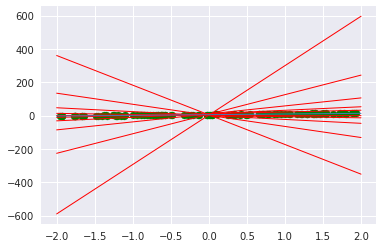

In [15]:
eta = 1.01  # learning rate
n_iterations = 100


theta = np.random.randn(2,1)  # random initialization

plt.scatter(x, y, color='g')

for iteration in range(n_iterations):
    if iteration < 10:
        plt.plot(x_true, x_true*theta[1]+theta[0], linewidth=1, color='r')
    gradients = 2/n * x_matrix.T.dot(x_matrix.dot(theta) - y)
    theta = theta - eta * gradients

plt.plot(x_true, y_true, linewidth=1)
plt.show()

# Уменьшение шага на каждой итерации

In [16]:
eta = 1  # learning rate
n_iterations = 1000

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/n * x_matrix.T.dot(x_matrix.dot(theta) - y)
    theta = theta - (eta/(iteration+1)) * gradients


print(theta)

[[4.91572913]
 [4.0263613 ]]


__Learning rate__ - гипперпараметр, и можно воспользоваться GridSearchCV, однако чтобы не учить каждый раз такое кол-во итераций, мы можем измерять норму градиента, и прекращать спуск, когда он "затух"

In [17]:
eta = 0.1  # learning rate
n_iterations = 1000
tol = 0.00001

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/n * x_matrix.T.dot(x_matrix.dot(theta) - y)
    if np.linalg.norm(gradients) < tol:
        break
    theta = theta - eta * gradients

print('Градиент затух на {} итерации '.format(iteration))
print(theta)

Градиент затух на 63 итерации 
[[4.91572427]
 [4.02636115]]


__Реализация в Scikit-Learn отсутствует__
  
  
# Cтохастический градиентный спуск  

In [18]:
n_epochs = 50

def learning_schedule(t):
    return t0 / (t + t1)

t0, t1 = 5, 100  # learning schedule hyperparameters


theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(n):
        random_index = np.random.randint(n)
        xi = x_matrix[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * n + i)
        theta = theta - eta * gradients
print(theta)

[[4.84943389]
 [3.98773999]]


In [19]:
from sklearn.linear_model import SGDRegressor

In [20]:
sgd = SGDRegressor(tol=0.0001)
#The stopping criterion. If it is not None, the iterations will stop when (loss > previous_loss - tol).
sgd.fit(x,y)
sgd.intercept_, sgd.coef_

(array([4.89607738]), array([4.02127822]))

# Полносязные нейронные сети (fully connected neural network) 

In [21]:
import random
import numpy as np

from tqdm import tqdm
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

In [22]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
data = load_digits()

X, y = data.images, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.6,
                                                    test_size=0.4, 
                                                    shuffle=True,
                                                   random_state=18)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, 
                                                    train_size=0.5,
                                                    test_size=0.5, 
                                                    shuffle=True,
                                                   random_state=18)

print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)

Training data shape:  (1078, 8, 8)
Validation data shape:  (359, 8, 8)
Test data shape:  (360, 8, 8)


In [23]:
from sklearn.metrics import accuracy_score

In [24]:
from keras.models import Sequential # Модель, где все слои соединены друг с другом
from keras.layers import Dense, Flatten, Activation # Слой, где все нйероны предыдущего уровня соединены с нейронами следующего
from keras.utils import np_utils
from keras.optimizers import SGD

Using TensorFlow backend.


In [25]:
np.random.seed(18)

X_train /= 16
X_val /= 16
X_test /= 16

In [26]:
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_val = np_utils.to_categorical(y_val, num_classes=10)

In [27]:
batch_size = 100 # Выбираем размер Батча
epochs = 100
lrate = 0.01
decay = lrate/epochs

In [28]:
# Создаем последовательную модель
model = Sequential()

# Добавляем слои

model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# Компилируем модель
opt = SGD(lr=0.01, decay=decay) 
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              65000     
_________________________________________________________________
activation_1 (Activation)    (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               100100    
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total para

1. Binary Cross entropy vs Categorical cross entropy:
$$ L = -\frac{1}{n} \sum_{i=1}^{n} {\bigl[y_i log(p_i)+(1−y_i)log(1−p_i)\bigr]} =-\frac{1}{n} \sum_{j=1}^{m}y_{ij}log(p_{ij})  $$
2. Softmax — это обобщение логистической функции для многомерного случая:
$$ \sigma (z)_i = \frac {e^{z_i}}{\sum_K{e^{z_k}}} $$
функция преобразует вектор $z$ размерности $K$ в вектор $\sigma$  той же размерности, где каждая координата $\sigma_i$ полученного вектора представлена вещественным числом в интервале $[0,1]$ и сумма координат равна 1.

3. Почему $8 \times 8 \times 1000 = 64 000 $, а параметров на первом слое: $65 000$?   

In [29]:
# Обучаем модель! 
model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_val, y_val),
              shuffle=True)

Train on 1078 samples, validate on 359 samples
Epoch 1/100
1078/1078 [==============================] - 1s 621us/step - loss: 2.2753 - acc: 0.1085 - val_loss: 2.2545 - val_acc: 0.1114
Epoch 2/100
1078/1078 [==============================] - 0s 230us/step - loss: 2.2411 - acc: 0.1698 - val_loss: 2.2215 - val_acc: 0.2061
Epoch 3/100
1078/1078 [==============================] - 0s 265us/step - loss: 2.2081 - acc: 0.2792 - val_loss: 2.1890 - val_acc: 0.3482
Epoch 4/100
1078/1078 [==============================] - 0s 224us/step - loss: 2.1753 - acc: 0.3942 - val_loss: 2.1560 - val_acc: 0.5181
Epoch 5/100
1078/1078 [==============================] - 0s 225us/step - loss: 2.1420 - acc: 0.5241 - val_loss: 2.1219 - val_acc: 0.6240
Epoch 6/100
1078/1078 [==============================] - 0s 215us/step - loss: 2.1076 - acc: 0.6633 - val_loss: 2.0861 - val_acc: 0.7047
Epoch 7/100
1078/1078 [==============================] - 0s 156us/step - loss: 2.0720 - acc: 0.7106 - val_loss: 2.0491 - val_acc: 0

Epoch 60/100
1078/1078 [==============================] - 0s 151us/step - loss: 0.5237 - acc: 0.9267 - val_loss: 0.4737 - val_acc: 0.9304
Epoch 61/100
1078/1078 [==============================] - 0s 123us/step - loss: 0.5137 - acc: 0.9239 - val_loss: 0.4629 - val_acc: 0.9359
Epoch 62/100
1078/1078 [==============================] - 0s 165us/step - loss: 0.5033 - acc: 0.9239 - val_loss: 0.4527 - val_acc: 0.9331
Epoch 63/100
1078/1078 [==============================] - 0s 107us/step - loss: 0.4938 - acc: 0.9258 - val_loss: 0.4434 - val_acc: 0.9359
Epoch 64/100
1078/1078 [==============================] - 0s 200us/step - loss: 0.4845 - acc: 0.9276 - val_loss: 0.4344 - val_acc: 0.9359
Epoch 65/100
1078/1078 [==============================] - 0s 175us/step - loss: 0.4757 - acc: 0.9276 - val_loss: 0.4258 - val_acc: 0.9387
Epoch 66/100
1078/1078 [==============================] - 0s 105us/step - loss: 0.4673 - acc: 0.9267 - val_loss: 0.4180 - val_acc: 0.9359
Epoch 67/100
1078/1078 [==========

In [30]:
accuracy_score(model.predict_classes(X_test), y_test)

0.9388888888888889

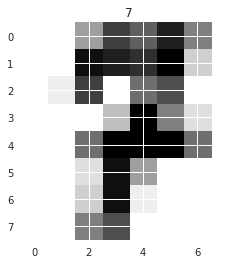

,predictions
7,0.966735
3,0.013184
9,0.009054


In [31]:
# Проверим случаный семпл:
class_names = np.unique(y_test)

num_pred = np.random.randint(0,360)

plt.title(y_test[num_pred])
plt.imshow(X_test[num_pred], cmap='gray_r')
plt.show()

pred = pd.DataFrame(model.predict(X_test)[num_pred], index=class_names, columns=['predictions']
                   ).sort_values(by = 'predictions', ascending=False)
pred.head(3)

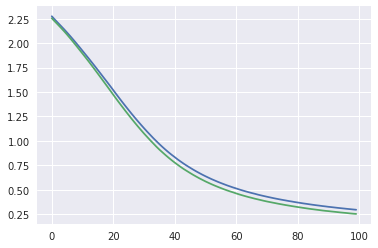

In [32]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])

# Сверточные нейронные сети (Convolution neural network)

In [33]:
from keras.layers import Conv2D, MaxPooling2D, Dropout

In [34]:
X_train = X_train.reshape(X_train.shape[0], 8, 8, 1)
X_test = X_test.reshape(X_test.shape[0], 8, 8, 1)
X_val = X_val.reshape(X_val.shape[0], 8, 8, 1)

In [35]:
# Создаем последовательную модель
model = Sequential()

# Добавляем слои
model.add(Conv2D(100, (3, 3), input_shape=(8, 8, 1), padding='same', activation='relu'))
#model.add(Dropout(0.2))
model.add(Conv2D(10, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


# Компилируем модель
sgd = SGD(lr=lrate, decay=decay)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 8, 8, 100)         1000      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 10)          9010      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 10)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               82432     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 97,572
Trainable params: 97,572
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
# Обучаем модель! 
model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_val, y_val),
              shuffle=True)

Train on 1078 samples, validate on 359 samples
Epoch 1/100
1078/1078 [==============================] - 2s 2ms/step - loss: 2.3066 - acc: 0.0482 - val_loss: 2.3039 - val_acc: 0.0585
Epoch 2/100
1078/1078 [==============================] - 1s 1ms/step - loss: 2.3021 - acc: 0.0863 - val_loss: 2.3000 - val_acc: 0.0891
Epoch 3/100
1078/1078 [==============================] - 1s 1ms/step - loss: 2.2983 - acc: 0.1317 - val_loss: 2.2967 - val_acc: 0.1504
Epoch 4/100
1078/1078 [==============================] - 1s 1ms/step - loss: 2.2952 - acc: 0.1605 - val_loss: 2.2939 - val_acc: 0.1643
Epoch 5/100
1078/1078 [==============================] - 1s 1ms/step - loss: 2.2923 - acc: 0.1725 - val_loss: 2.2911 - val_acc: 0.1838
Epoch 6/100
1078/1078 [==============================] - 1s 982us/step - loss: 2.2896 - acc: 0.2004 - val_loss: 2.2884 - val_acc: 0.1894
Epoch 7/100
1078/1078 [==============================] - 1s 1ms/step - loss: 2.2870 - acc: 0.2096 - val_loss: 2.2857 - val_acc: 0.1978
Epoch 

In [37]:
accuracy_score(model.predict_classes(X_test), y_test)

0.95

# Сохранение и загрузка обученной модели

In [38]:
#Сохраним модель и веса
with open('cnn.json', 'w') as model_file:
            model_file.write(model.to_json())

model.save_weights('cnn.h5')

In [39]:
from keras.models import model_from_json
json_file = open("cnn.json", "r")
loaded_model_json = json_file.read()
json_file.close()
# Создаем модель на основе загруженных данных
loaded_model = model_from_json(loaded_model_json)
# Загружаем веса в модель
loaded_model.load_weights("cnn.h5")

In [40]:
print(accuracy_score(y_test, loaded_model.predict_classes(X_test)))
loaded_model.summary()

0.95
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 8, 8, 100)         1000      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 10)          9010      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 10)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               82432     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 97,572
Trainable params: 97,572
Non-trainable params: 0
_________________________________________________________________


# Визуализация сверточных слоев

In [41]:
# Функция для отрисовки фильтров
def plot_conv_weights(model, layer_name):
    W = model.get_layer(name=layer_name).get_weights()[0]
    if len(W.shape) == 4:
        W = np.squeeze(W)
        W = W.reshape((W.shape[0], W.shape[1], W.shape[2])) 
        fig, axs = plt.subplots(2,5, figsize=(16,8))
        fig.subplots_adjust(hspace = .01, wspace=1)
        axs = axs.ravel()
        for i in range(10):
            axs[i].imshow(W[:,:,i], cmap='gray_r')
            axs[i].set_title(str(i+1))

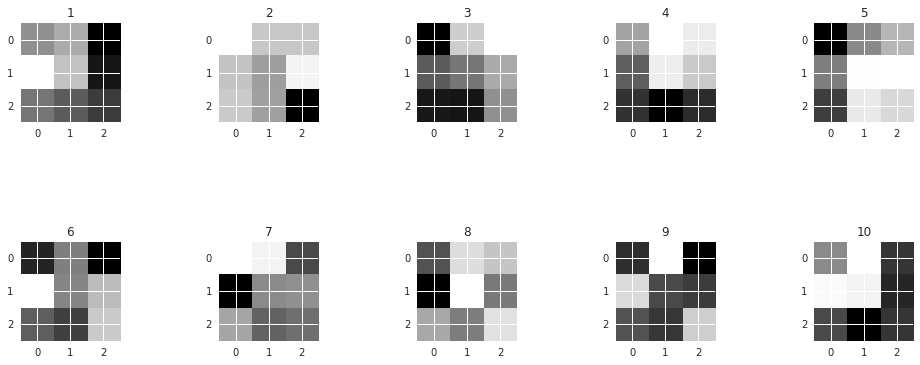

In [42]:
plot_conv_weights(loaded_model, 'conv2d_1')

In [43]:
from keras import Model

In [44]:
activation_model = Model(inputs=loaded_model.input, 
                         outputs=loaded_model.layers[0].output)
activation_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 8, 8, 1)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 100)         1000      
Total params: 1,000
Trainable params: 1,000
Non-trainable params: 0
_________________________________________________________________


In [45]:
test_img = np.expand_dims(X_test[num_pred], axis=0)
activation = activation_model.predict(test_img)
print(activation.shape)

(1, 8, 8, 100)


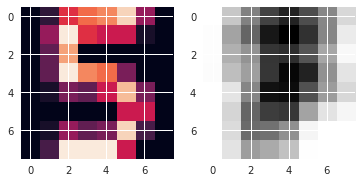

In [46]:
num_pred = np.random.randint(0,360)
plt.subplot(121)
plt.imshow(X_test[num_pred].reshape(8,8))
plt.subplot(122)
plt.imshow(activation[0, :, :, 6], cmap='gray_r')
plt.show()